# 글리프 마켓의 historical data와 데일리 기사들의 DB 연결 및 시각화. 

글리프 마켓 데이터는 매일매일의 현황을 알기엔 좋지만 그동안의 추이를 보기엔 힘들었습니다. 

이를 그래프로 그려 시각화합니다. (수치, 증가율 등)

또한 그동안은 마켓과 당일 기사가 따로 정리되었는데, 이 두 DB를 연결합니다. 

이를 통해 마켓 그래프에서 과거 특이 수치를 보이는 지점에 어떤 기사가 (글리프에서) 정리되었는지 확인할 수 있습니다. 

In [19]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime as dt

In [48]:
# %matplotlib notebook
%matplotlib inline

In [27]:
api_key = "BMQ11-wVhk-Rt78SQoi9"

In [39]:
## pandas_datareader로 예시 데이터를 다운로드. 
## API형태로 제공하는 데이터가 다양하기 때문에 추후 마켓 자동화 및 수집 항목 다각화 가능. (FF3 등)

start_date = dt.datetime(2019, 1, 1)
end_date = dt.datetime(2019, 1, 15)

# symbol = 'AAPL.US' # can't pass Quandl API key. 

df = web.DataReader('AAPL', 'yahoo', start_date, end_date)
df = df['Adj Close']
df

Date
2018-12-31    157.740005
2019-01-02    157.919998
2019-01-03    142.190002
2019-01-04    148.259995
2019-01-07    147.929993
2019-01-08    150.750000
2019-01-09    153.309998
2019-01-10    153.800003
2019-01-11    152.289993
2019-01-14    150.000000
2019-01-15    153.070007
Name: Adj Close, dtype: float64

In [38]:
df.shape

(11,)

In [44]:
article_df = pd.DataFrame({'Date':df.index, 'WSJ':"sample text WSJ", 'FT':"sample text FT", 'BB':"sample text BB"})
article_df = article_df.set_index('Date')

In [45]:
article_df

,WSJ,FT,BB
Date,,,
2018-12-31,sample text WSJ,sample text FT,sample text BB
2019-01-02,sample text WSJ,sample text FT,sample text BB
2019-01-03,sample text WSJ,sample text FT,sample text BB
2019-01-04,sample text WSJ,sample text FT,sample text BB
2019-01-07,sample text WSJ,sample text FT,sample text BB
2019-01-08,sample text WSJ,sample text FT,sample text BB
2019-01-09,sample text WSJ,sample text FT,sample text BB
2019-01-10,sample text WSJ,sample text FT,sample text BB
2019-01-11,sample text WSJ,sample text FT,sample text BB


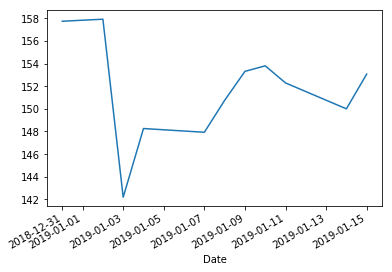

In [54]:
fig = plt.figure()
plot = fig.add_subplot(df.plot())
plot

In [56]:
def on_plot_hover(event):
    for curve in plot.get_lines():
        if curve.contains(event)[0]:
#             print "over %s" % curve.get_gid()
            print("hello world")

In [62]:
fig.canvas.mpl_connect('motion_notify_event', on_plot_hover)
plt.show();